# Project Of Analyzing Sleep Data 
## Using Python & Libraries: Numpy, Pandas & MatPlotLib 
### (Project-1 Shahriyar Ahmed Mahir)

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
df = pd.read_csv("Health_Sleep_Statistics.csv")

In [147]:
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [148]:
df.size

1200

In [149]:
df.columns.size

12

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [151]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [152]:
# Find whether null values are there
df.isna().sum()

# Therefor no null values

User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

In [153]:
# Find whether duplicates
df.duplicated().sum()

# There no duplicates

np.int64(0)

In [154]:
df.drop(['User ID'], axis = 1, inplace = True)

In [155]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


### Age VS Sleep Quality Analysis

In [156]:
age_sleep_quality_corr = df[['Age', 'Sleep Quality']].corr()

In [157]:
age_sleep_quality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


In [158]:
age_sleep_quality_corr['Age']
# This is showing that this is inversely proportional to my age
# Means if my age is increasing, I am having bad sleep quality

Age              1.000000
Sleep Quality   -0.848356
Name: Age, dtype: float64

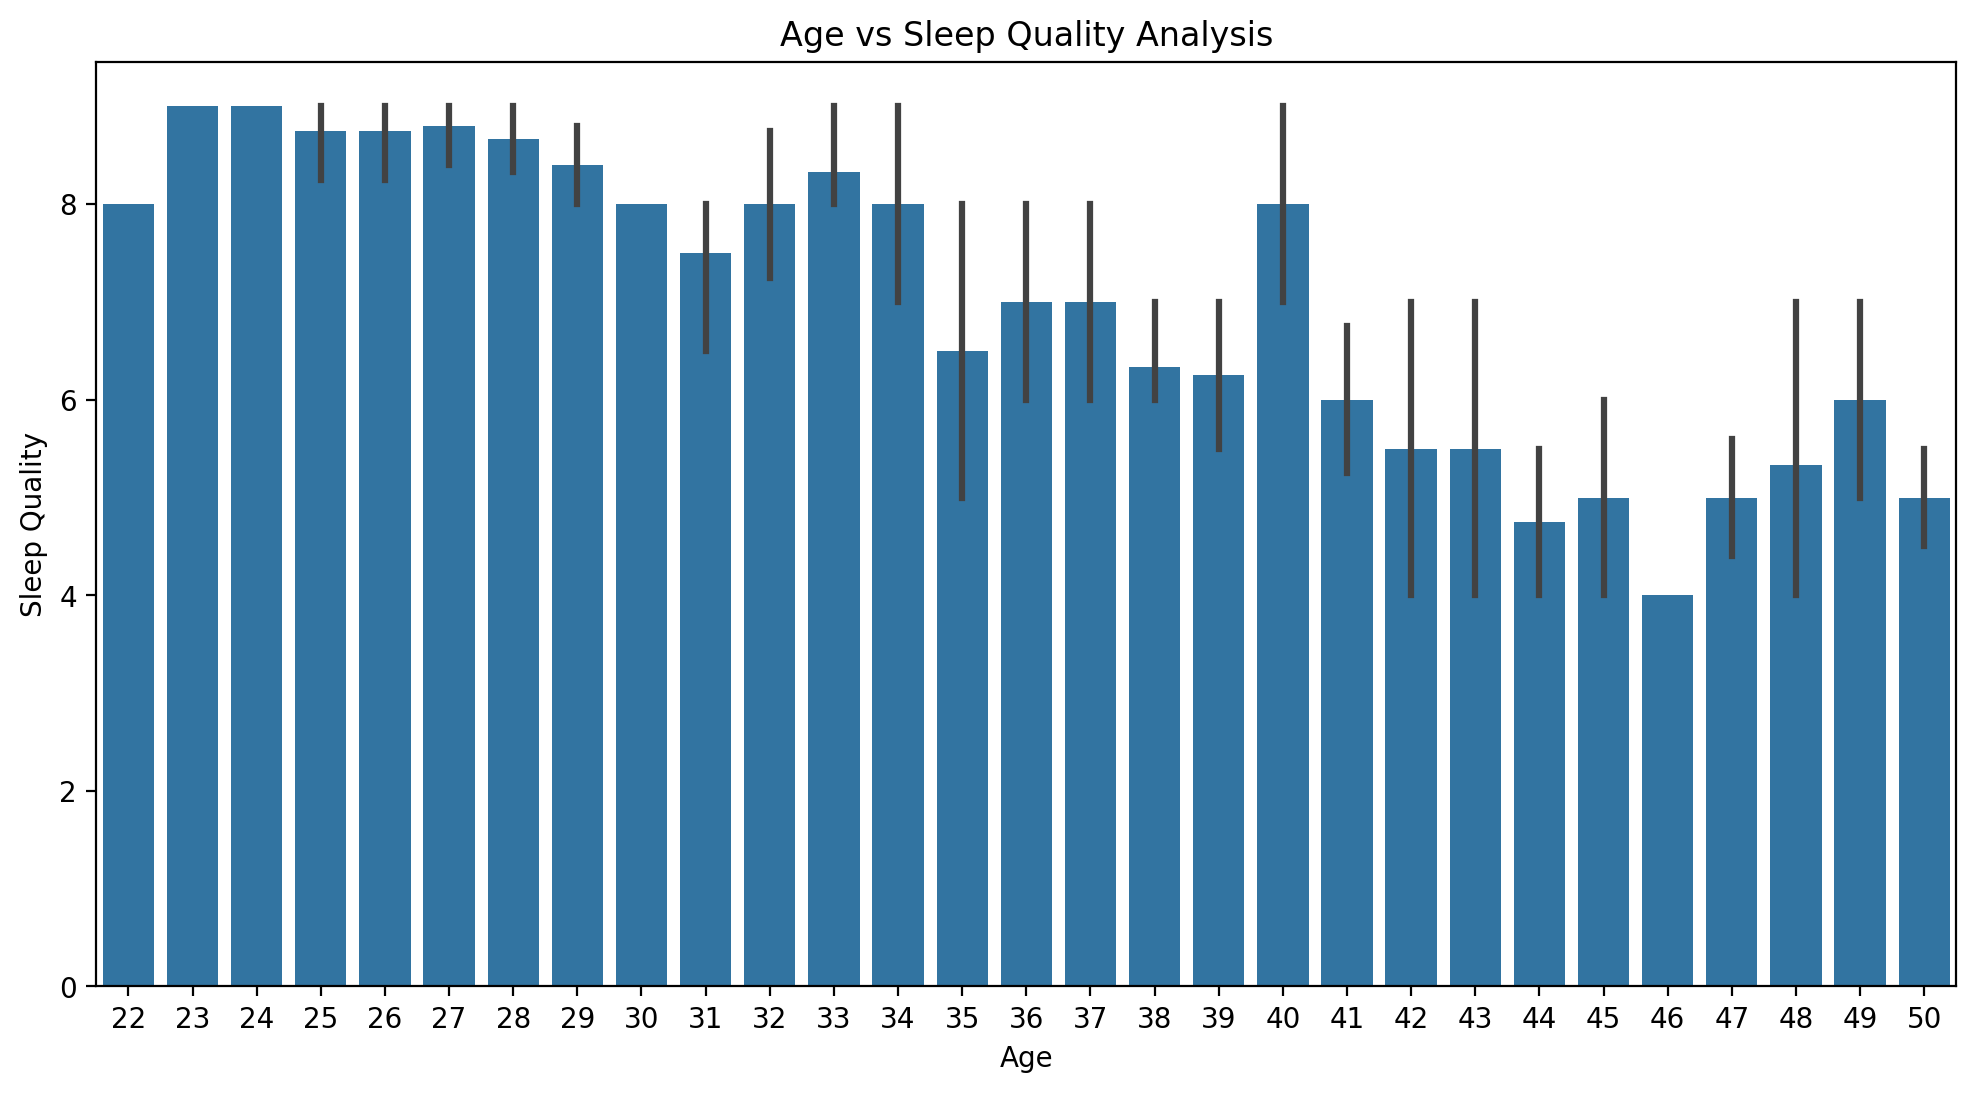

In [159]:
plt.figure(figsize = (12,6), dpi = 200)
sns.barplot(x = 'Age', y = 'Sleep Quality', data = df)
plt.title("Age vs Sleep Quality Analysis")
plt.show()

In [160]:
from sklearn.linear_model import LinearRegression
age_sleep_quality_model = LinearRegression()

x = df[['Age']]
y = df['Sleep Quality']

age_sleep_quality_model.fit(x,y)

LinearRegression()

In [161]:
age_sleep_quality_model.intercept_

np.float64(13.268812023190648)

In [162]:
age_sleep_quality_model.coef_

array([-0.17408531])

In [163]:
age_sleep_quality_predictions = age_sleep_quality_model.predict(x)

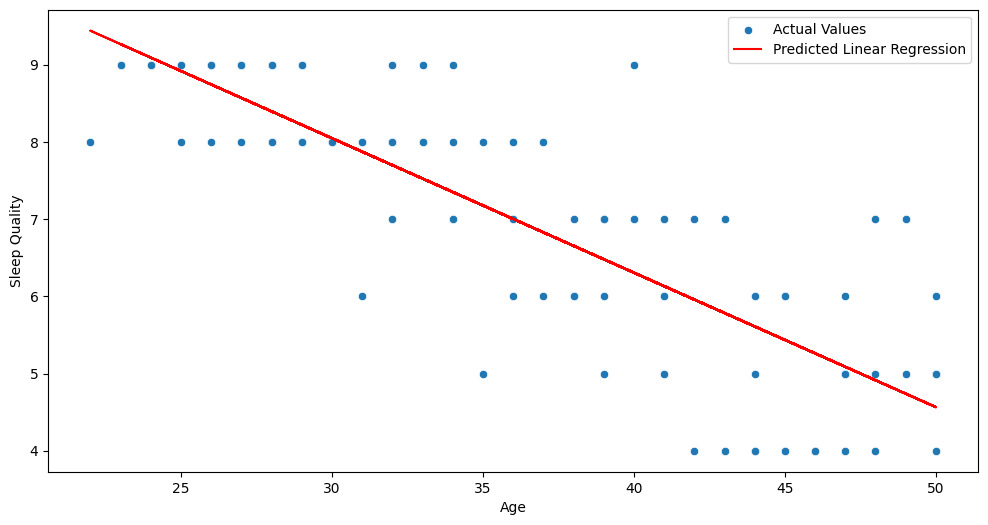

In [164]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Age', y = 'Sleep Quality', data = df, label = "Actual Values")

#Plotting Actual vs Predicted
plt.plot(x, age_sleep_quality_predictions, color = 'red', label = 'Predicted Linear Regression')
plt.legend()

### Physical Activity vs Sleep Quality

In [165]:
df['Physical Activity Level'].head()

0    medium
1       low
2      high
3       low
4      high
Name: Physical Activity Level, dtype: object

In [166]:
df['Sleep Quality'].head()

0    8
1    7
2    9
3    5
4    8
Name: Sleep Quality, dtype: int64

In [167]:
df['Gender'].head()

0    f
1    m
2    f
3    m
4    f
Name: Gender, dtype: object

<Axes: xlabel='Gender', ylabel='Sleep Quality'>

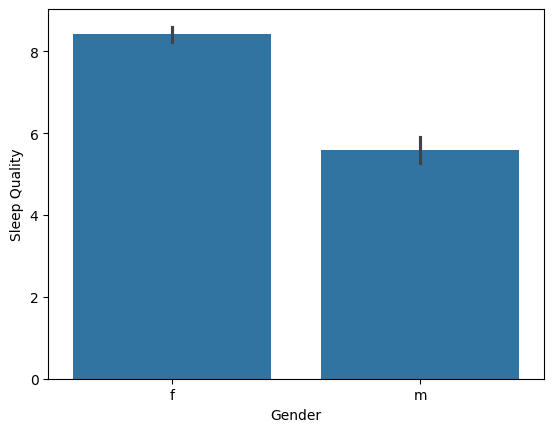

In [168]:
sns.barplot(x = 'Gender', y = 'Sleep Quality', data = df)

<Axes: xlabel='Physical Activity Level', ylabel='Sleep Quality'>

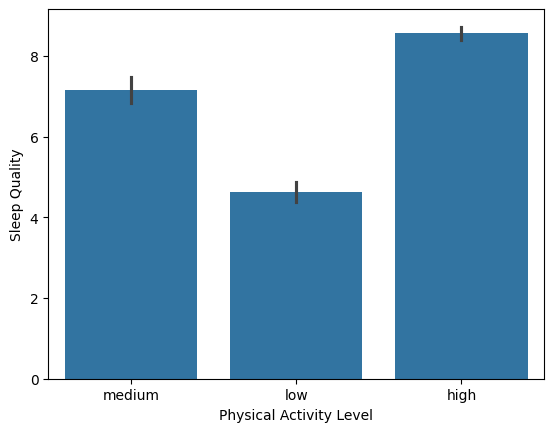

In [169]:
sns.barplot(x = 'Physical Activity Level', y = 'Sleep Quality', data = df)

In [170]:
custom_codes = {'low': 1, 'medium' : 2, 'high': 3}
df['Physical Activity Level'] = df['Physical Activity Level'].map(custom_codes)
df['Physical Activity Level'].head()

0    2
1    1
2    3
3    1
4    3
Name: Physical Activity Level, dtype: int64

<Axes: xlabel='Gender', ylabel='Physical Activity Level'>

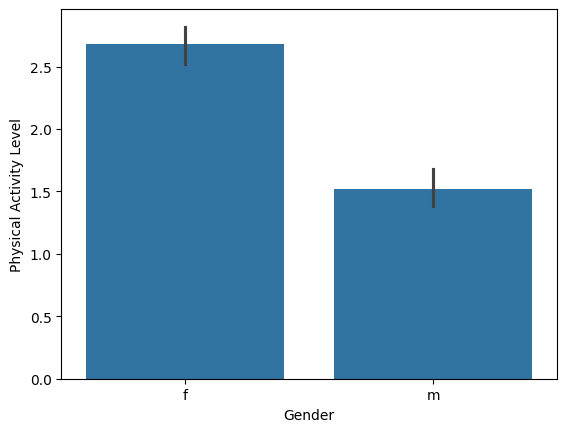

In [171]:
sns.barplot(x = 'Gender', y = 'Physical Activity Level', data = df)

# Therefor overall physical activity is more in females

# And that is why females are having more better sleep quality!! than men
# This is an interdependent finding

In [172]:
from scipy import stats

sleep_quality_males = df[df['Gender'] == 'm']['Sleep Quality']
sleep_quality_females = df[df['Gender'] == 'f']['Sleep Quality']

physical_activity_males = df[df['Gender'] == 'm']['Physical Activity Level']
physical_activity_females = df[df['Gender'] == 'f']['Physical Activity Level']

#### Finding T & P Values For Sleep Quality vs Physical Activity vs Gender

In [173]:
t_sleep_quality, p_sleep_quality = stats.ttest_ind(sleep_quality_males, sleep_quality_females)
print('T_stats Value For Sleep Quality vs Gender',t_sleep_quality, p_sleep_quality)

T_stats Value For Sleep Quality vs Gender -14.32032869841744 9.169233684159498e-26


#### Since t value is very high it can be said that sleep quality gets affected by gender
#### As well as the p value is very low ~ close to 0, so we reject the null hypothesis that the average values are same in both genders, acting as a strong evidence in terms of the difference between males and females

In [174]:
t_physical_activity, p_physical_activity = stats.ttest_ind(physical_activity_males, physical_activity_females)

print('T_stats Value For Physical Activity vs Gender', t_physical_activity, p_physical_activity)

T_stats Value For Physical Activity vs Gender -10.976982829848266 9.300752701778741e-19


#### Since t value is very high it can be said that physical activity is affected by gender
#### As well as the p value is extremely low, which we reject the null hypothesis that there is no effect of physical activity on gender.

### Time of Sleep vs Sleep Quality

In [175]:
df['Bedtime'].head()

0    23:00
1    00:30
2    22:45
3    01:00
4    23:30
Name: Bedtime, dtype: object

In [176]:
df['Wake-up Time'].head()

0    06:30
1    07:00
2    06:45
3    06:30
4    07:00
Name: Wake-up Time, dtype: object

In [177]:
# Function to handle HH:MM or float-like time formats
def sleep_time_helper_function(str_time):
    if '.' in str_time:
        h, m = str_time.split('.')
        m = int(float(f"0.{m}") * 60)  # Convert fractional minutes
        return int(h) + m / 60
    else:
        h, m = map(int, str_time.split(":"))
        return int(h) + m / 60

# Ensure columns are strings and preprocess them
df['Bedtime'] = df['Bedtime'].astype(str).str.replace('.0', ':00', regex=False)
df['Wake-up Time'] = df['Wake-up Time'].astype(str).str.replace('.0', ':00', regex=False)

# Apply helper function
df['Bedtime'] = df['Bedtime'].apply(sleep_time_helper_function)
df['Wake-up Time'] = df['Wake-up Time'].apply(sleep_time_helper_function)

# Calculate sleep duration
df['Sleep Duration Hours'] = (df['Wake-up Time'] - df['Bedtime']) % 24


In [178]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


<Axes: xlabel='Bedtime', ylabel='Sleep Quality'>

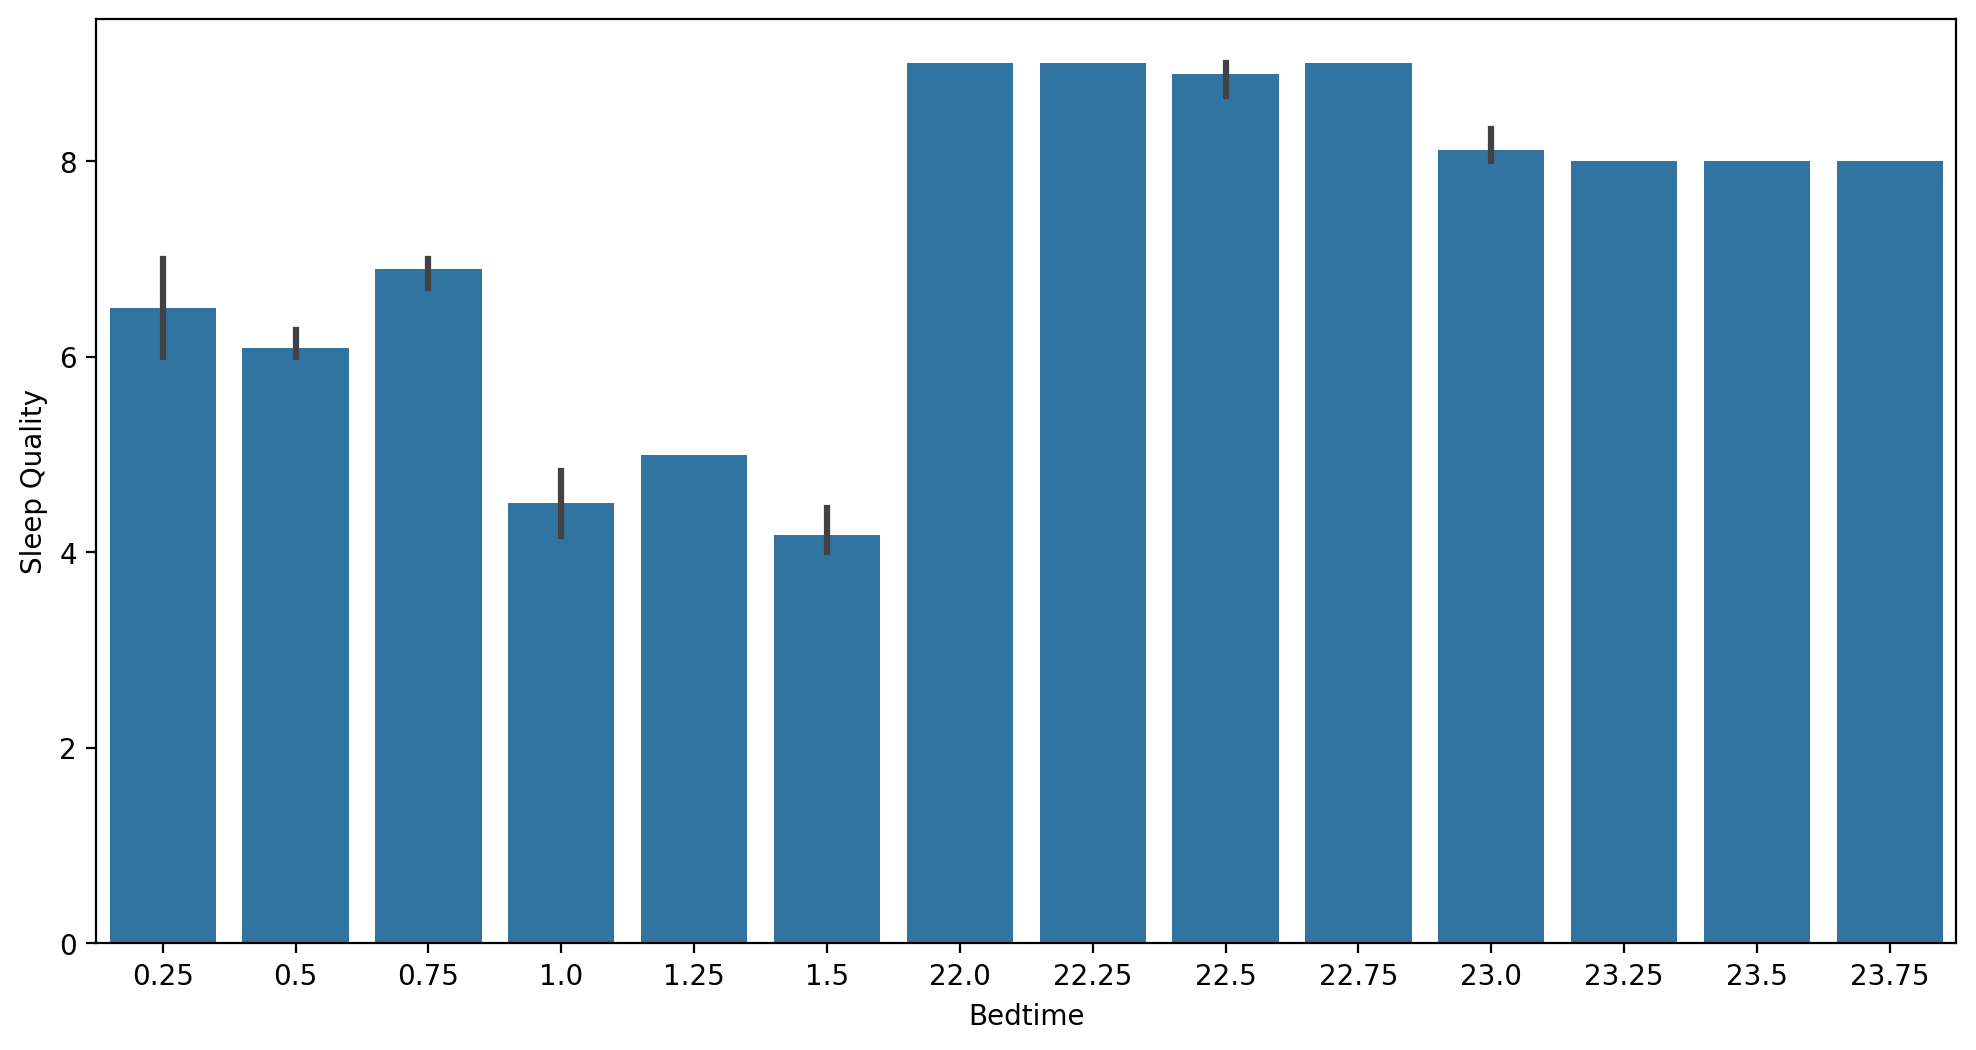

In [179]:
plt.figure(figsize = (12,6), dpi = 200)
sns.barplot(x = 'Bedtime', y = 'Sleep Quality', data = df)

<Axes: xlabel='Wake-up Time', ylabel='Sleep Quality'>

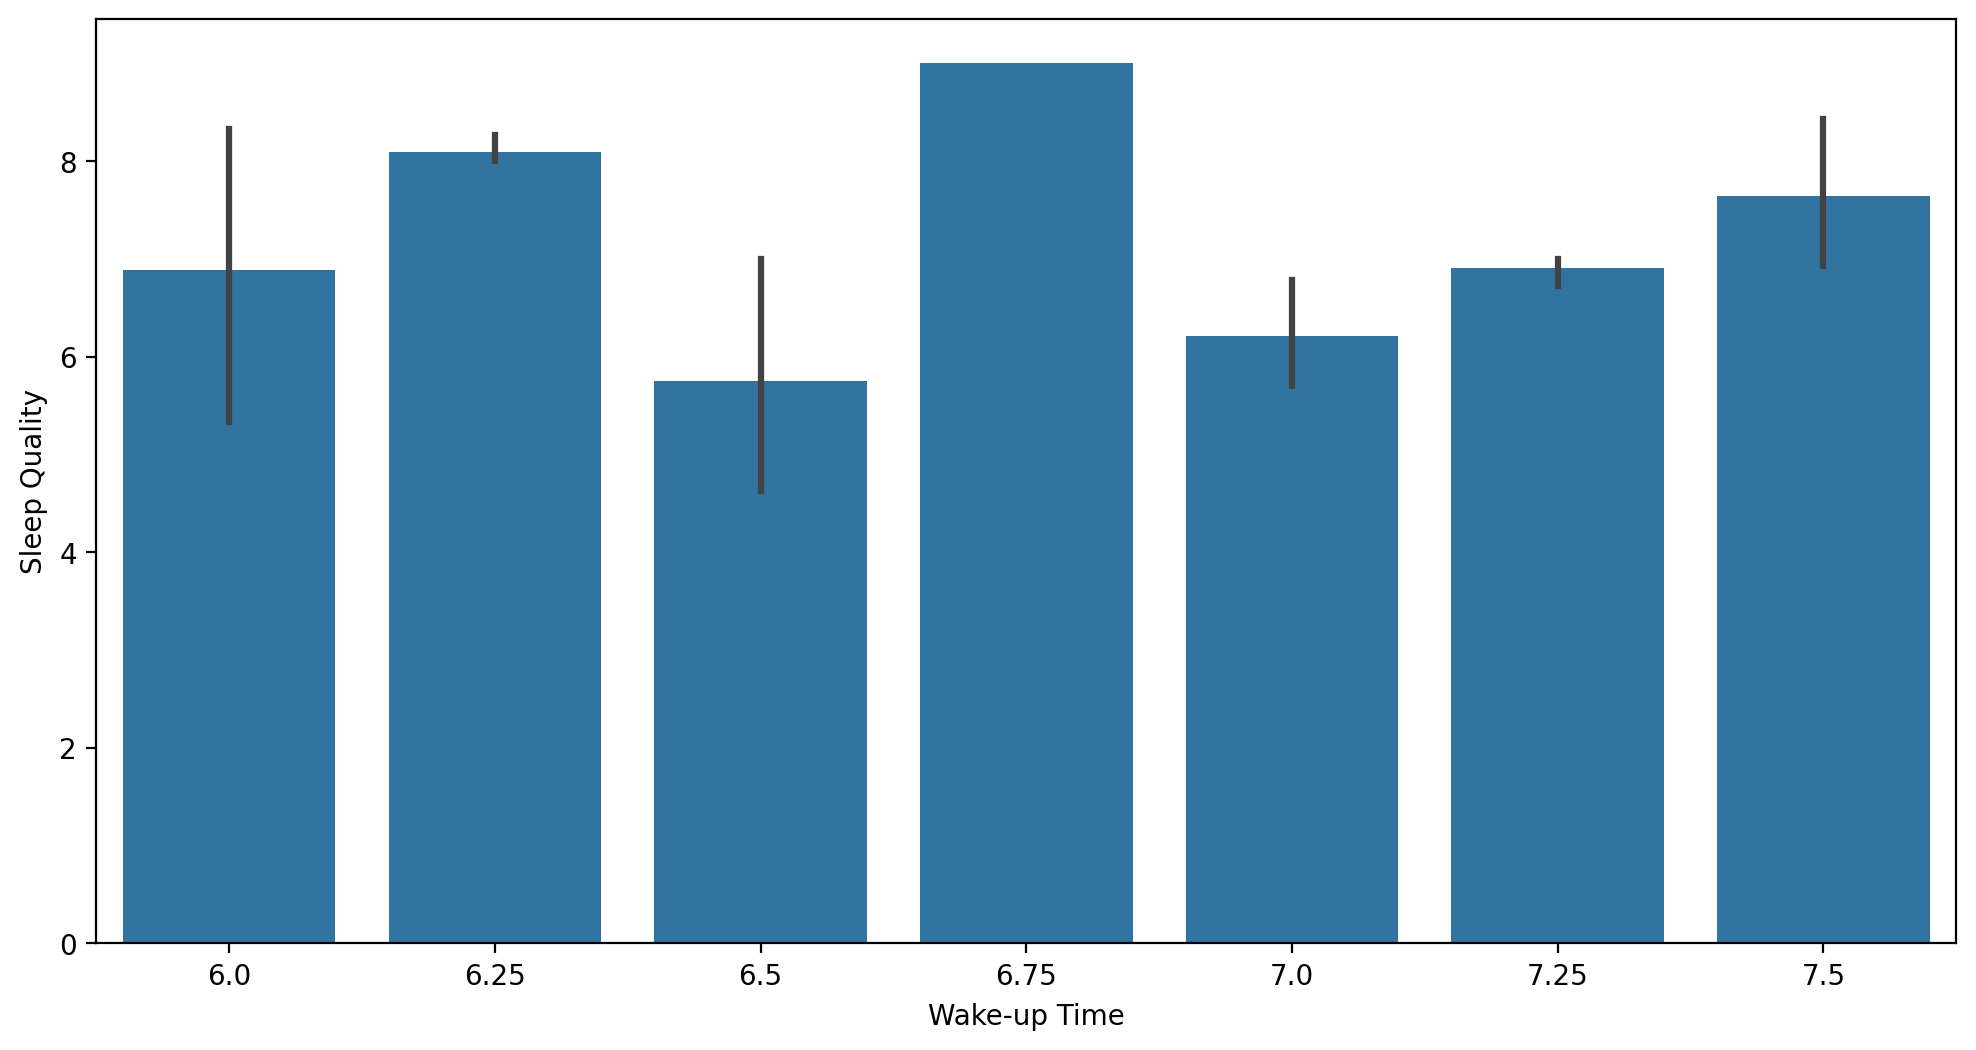

In [180]:
plt.figure(figsize = (12,6), dpi = 200)
sns.barplot(x = 'Wake-up Time', y = 'Sleep Quality', data = df)

<Axes: xlabel='Sleep Duration Hours', ylabel='Sleep Quality'>

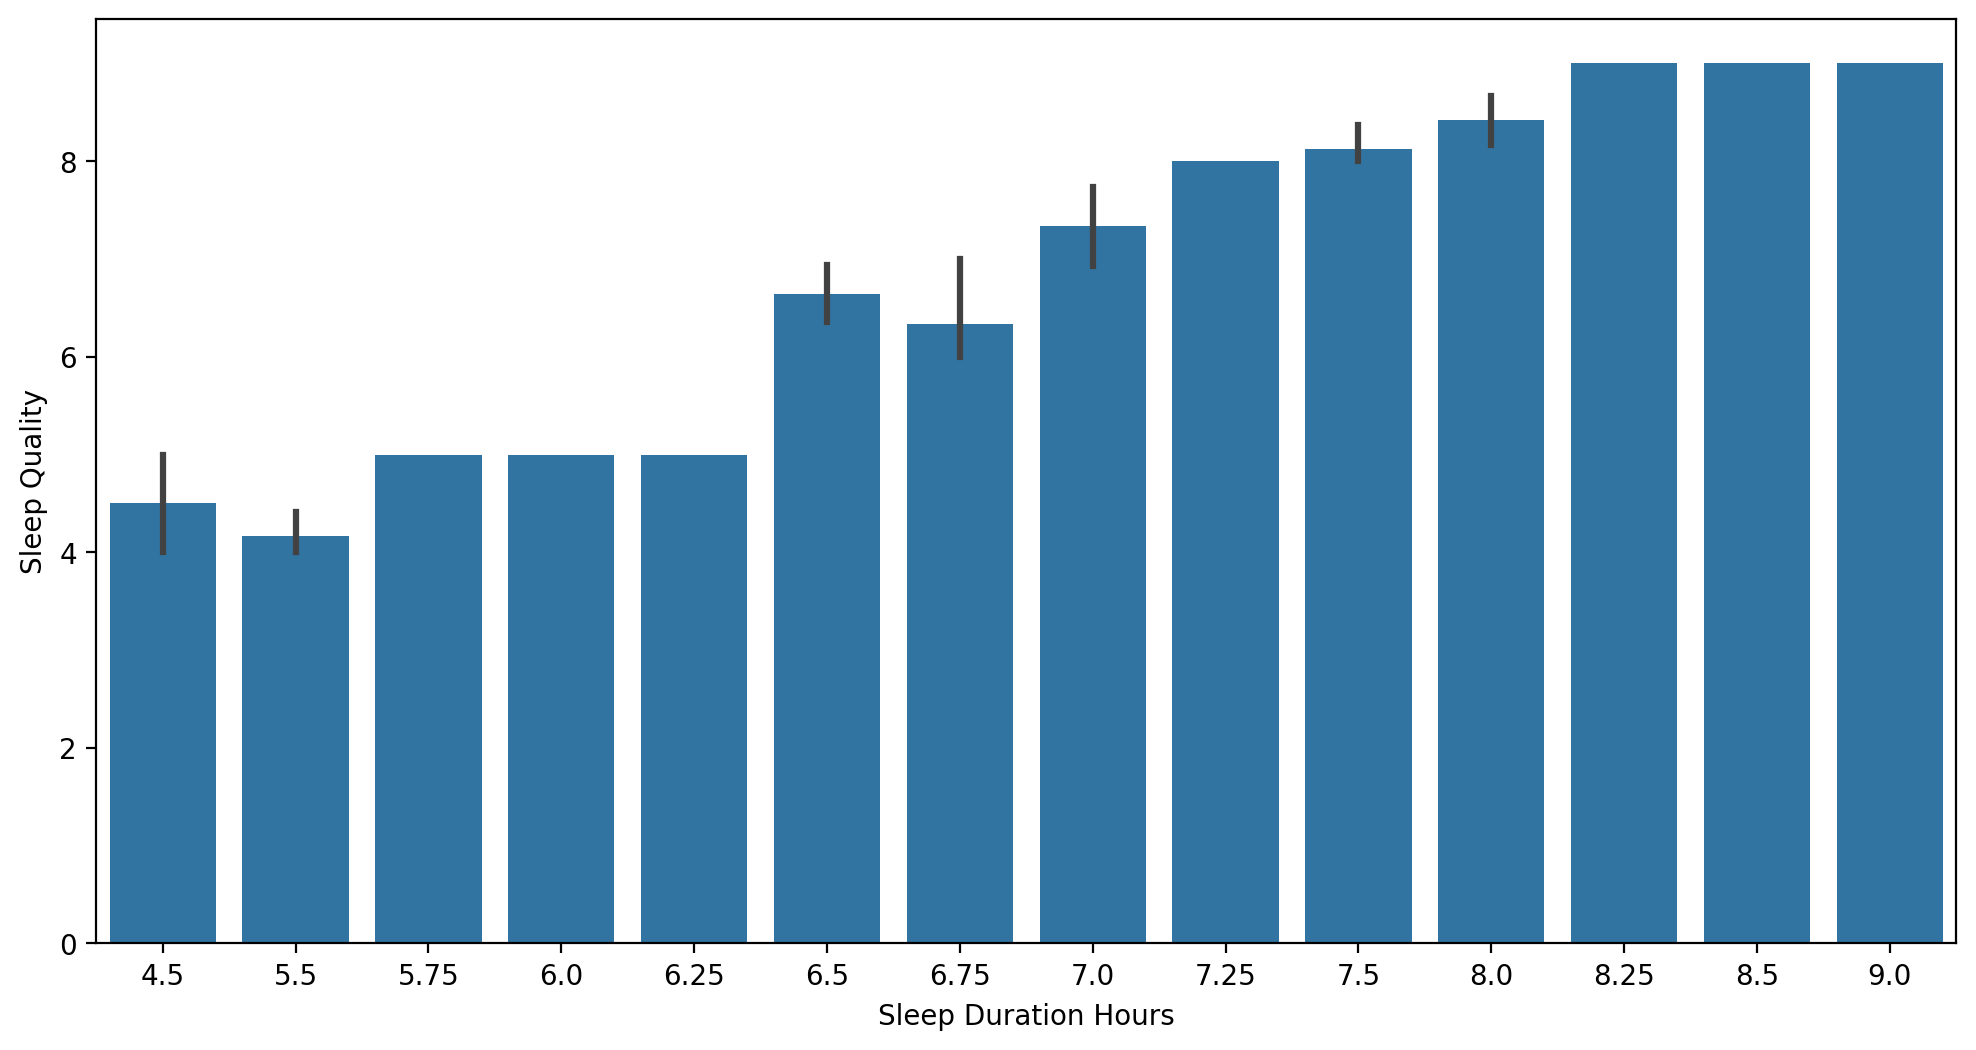

In [181]:
plt.figure(figsize = (12,6), dpi = 200)
sns.barplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df)

In [182]:
sleep_duration_quality_model = LinearRegression()

x = df[['Sleep Duration Hours']]
y = df['Sleep Quality']


sleep_duration_quality_model.fit(x, y)

LinearRegression()

In [183]:
sleep_duration_quality_model.coef_

array([1.36940999])

In [184]:
sleep_duration_quality_model.intercept_

np.float64(-2.575599349763152)

In [185]:
predictions = sleep_duration_quality_model.predict(x)
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


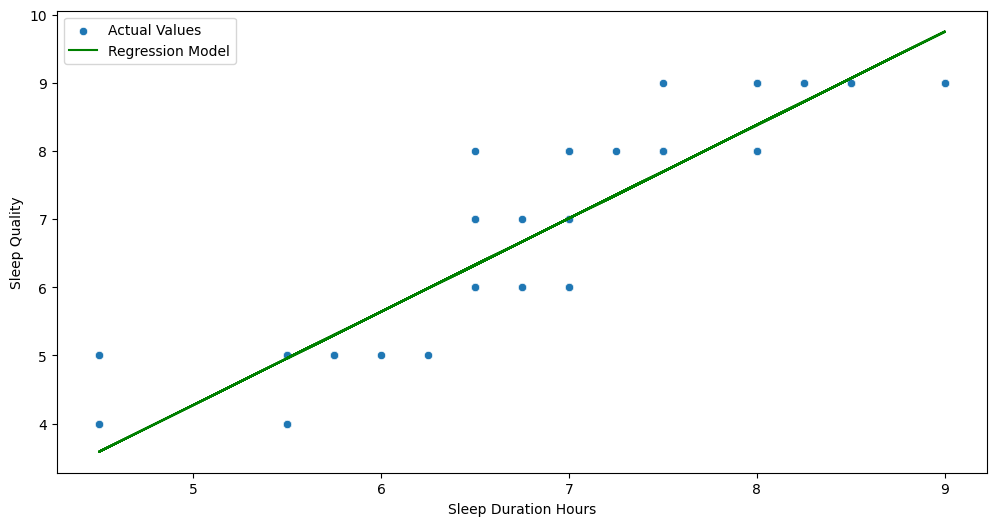

In [190]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df, label = 'Actual Values')
plt.plot(x, predictions, color = 'green', label = "Regression Model")
plt.legend()
plt.show()

#### Therefore Sleep Duration is Very Important For Sleep Quality

### Sleep Disorders vs Sleep Quality

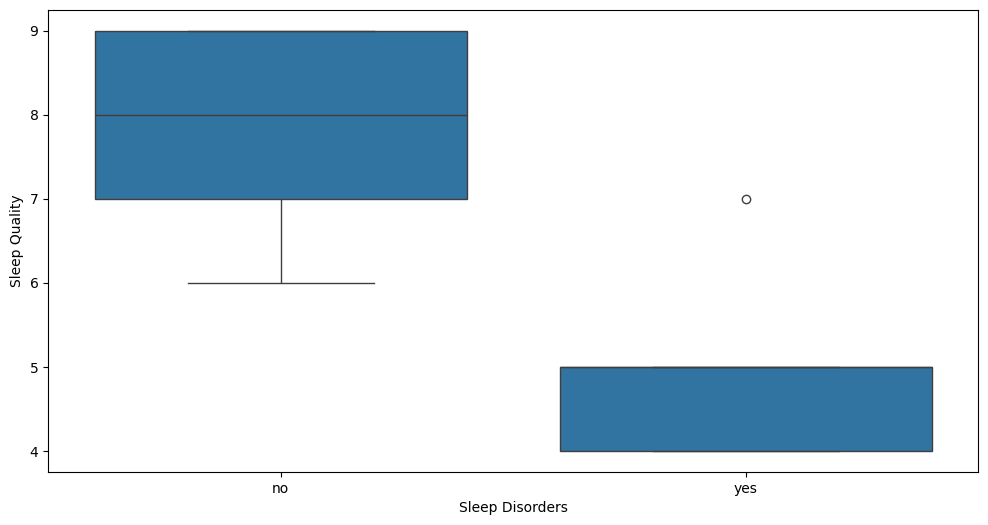

In [196]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Sleep Disorders', y = 'Sleep Quality', data = df)
plt.show()

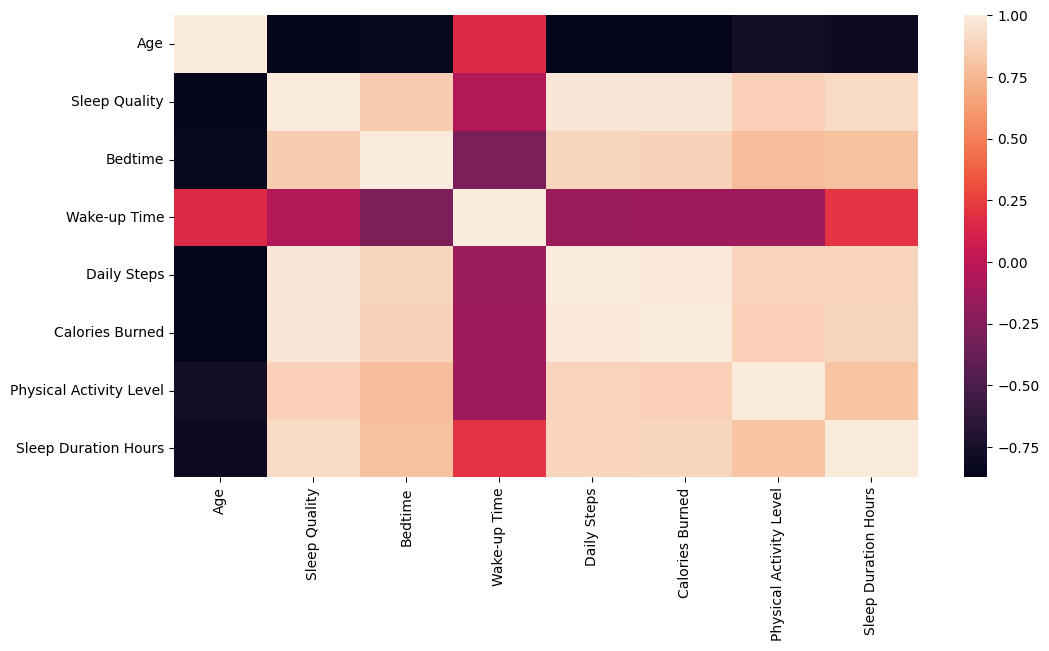

In [199]:
df_numeric_features = df.select_dtypes(include = ['int64', 'float'])

plt.figure(figsize = (12,6))
sns.heatmap(df_numeric_features.corr())
plt.show()

### To Do Left:

In [195]:
to_do = df.drop(['Wake-up Time', 'Physical Activity Level'], axis = 1, inplace = False)
to_do.head()

,Age,Gender,Sleep Quality,Bedtime,Daily Steps,Calories Burned,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,8000,2500,healthy,no,no,7.5
1,34,m,7,0.50,5000,2200,unhealthy,yes,yes,6.5
2,29,f,9,22.75,9000,2700,healthy,no,no,8.0
3,41,m,5,1.00,4000,2100,unhealthy,yes,no,5.5
4,22,f,8,23.50,10000,2800,medium,no,no,7.5
